## Import Dependency

In [128]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor

from sklearn.metrics import root_mean_squared_error

import pickle

## Load Data

In [129]:
df = pd.read_csv(r"C:\Users\nene0\Desktop\Projects\kaggle_Used_Car_Regression\featured_train_2024-09-19_20-18-11.csv")

df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,age,age_bins,hp,engine_liter,cylinder,num_gear
0,MINI,Cooper S Base,213000,Gasoline,Automatic,Yellow,Gray,None reported,Yes,4200,17,16-20 Years,172.0,1.6,4.0,6
1,Lincoln,LS V8,143250,Gasoline,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,22,Old,252.0,3.9,8.0,6
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,Automatic,Blue,Gray,None reported,Yes,13900,22,Old,360.0,5.3,8.0,6
3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,7,6-10 Years,420.0,5.0,8.0,6
4,Mercedes-Benz,Metris Base,7388,Gasoline,Automatic,Black,Beige,None reported,Yes,97500,3,3-5 Years,208.0,2.0,4.0,7


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188373 entries, 0 to 188372
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         188373 non-null  object 
 1   model         188373 non-null  object 
 2   milage        188373 non-null  int64  
 3   fuel_type     188373 non-null  object 
 4   transmission  188373 non-null  object 
 5   ext_col       188373 non-null  object 
 6   int_col       188373 non-null  object 
 7   accident      188373 non-null  object 
 8   clean_title   188373 non-null  object 
 9   price         188373 non-null  int64  
 10  age           188373 non-null  int64  
 11  age_bins      188373 non-null  object 
 12  hp            188373 non-null  float64
 13  engine_liter  188373 non-null  float64
 14  cylinder      188373 non-null  float64
 15  num_gear      188373 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 23.0+ MB


In [131]:
df['price'].describe()

count    188373.000000
mean      42206.763283
std       49034.762873
min        2000.000000
25%       17000.000000
50%       30775.000000
75%       49883.000000
max      749950.000000
Name: price, dtype: float64

## Preprocessing

### Numeric Feature Scaling

In [132]:
# Separate the target variable.

target_var = df['price']

In [133]:
df.drop(columns=['price'], inplace=True)

In [134]:
pre_scale_data = df[df.select_dtypes(['float', 'int']).columns]

pre_scale_data

,milage,age,hp,engine_liter,cylinder,num_gear
0,213000,17,172.0,1.6,4.0,6
1,143250,22,252.0,3.9,8.0,6
2,136731,22,360.0,5.3,8.0,6
3,19500,7,420.0,5.0,8.0,6
4,7388,3,208.0,2.0,4.0,7
...,...,...,...,...,...,...
188368,49000,7,420.0,6.2,8.0,6
188369,28600,6,385.0,3.0,6.0,8
188370,13650,3,469.0,4.0,8.0,7
188371,13895,2,333.0,3.0,6.0,1


In [135]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(pre_scale_data), columns=pre_scale_data.columns)

In [136]:
pickle.dump(scaler, open("scaler.pickle", "wb"))

In [137]:
scaled_data.head()

,milage,age,hp,engine_liter,cylinder,num_gear
0,2.957166,1.563313,-1.602993,-1.667211,-1.640379,-0.425349
1,1.556537,2.448261,-0.849770,0.086883,1.213316,-0.425349
2,1.425631,2.448261,0.167082,1.154592,1.213316,-0.425349
3,-0.928450,-0.206584,0.732000,0.925797,1.213316,-0.425349
4,-1.171668,-0.914543,-1.264043,-1.362151,-1.640379,0.283389


### Log Transform

In [138]:
target_var.skew()

5.547478797658133

<Axes: >

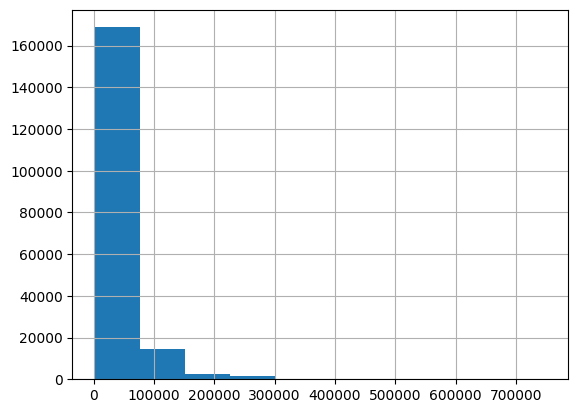

In [139]:
target_var.hist()

In [140]:
np.log(target_var).skew()

0.0176145846469097

In [141]:
log_target = np.log(target_var)

In [142]:
np.exp(log_target)

0          4200.0
1          4999.0
2         13900.0
3         45000.0
4         97500.0
           ...   
188368    27500.0
188369    30000.0
188370    86900.0
188371    84900.0
188372    28995.0
Name: price, Length: 188373, dtype: float64

### Categorical Encoding

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188373 entries, 0 to 188372
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         188373 non-null  object 
 1   model         188373 non-null  object 
 2   milage        188373 non-null  int64  
 3   fuel_type     188373 non-null  object 
 4   transmission  188373 non-null  object 
 5   ext_col       188373 non-null  object 
 6   int_col       188373 non-null  object 
 7   accident      188373 non-null  object 
 8   clean_title   188373 non-null  object 
 9   age           188373 non-null  int64  
 10  age_bins      188373 non-null  object 
 11  hp            188373 non-null  float64
 12  engine_liter  188373 non-null  float64
 13  cylinder      188373 non-null  float64
 14  num_gear      188373 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 21.6+ MB


In [144]:
df['accident'].unique(), df['clean_title'].unique()

(array(['None reported', 'At least 1 accident or damage reported',
        'Unknown'], dtype=object),
 array(['Yes', 'Unknown'], dtype=object))

In [145]:
# Change 'None Reported' and 'Unknown' = 0, 'At least 1 accident or damage reported' = 1
# Change 'Yes' = 1, 'Unknown' = 0

df['accident'] =  df['accident'].map(lambda x: 1 if x=='At least 1 accident or damage reported' else 0)
df['clean_title'] =  df['clean_title'].map(lambda x: 1 if x=='Yes' else 0)

In [146]:
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,age,age_bins,hp,engine_liter,cylinder,num_gear
0,MINI,Cooper S Base,213000,Gasoline,Automatic,Yellow,Gray,0,1,17,16-20 Years,172.0,1.6,4.0,6
1,Lincoln,LS V8,143250,Gasoline,Automatic,Silver,Beige,1,1,22,Old,252.0,3.9,8.0,6
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,Automatic,Blue,Gray,0,1,22,Old,360.0,5.3,8.0,6
3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,0,1,7,6-10 Years,420.0,5.0,8.0,6
4,Mercedes-Benz,Metris Base,7388,Gasoline,Automatic,Black,Beige,0,1,3,3-5 Years,208.0,2.0,4.0,7


In [147]:
df.describe(include='object')

,brand,model,fuel_type,transmission,ext_col,int_col,age_bins
count,188373,188373,188373,188373,188373,188373,188373
unique,57,1897,7,10,317,152,6
top,Ford,F-150 XLT,Gasoline,Automatic,Black,Black,6-10 Years
freq,23012,2944,166179,147710,48646,107628,62671


In [148]:
pre_enc_data = df[df.select_dtypes(['object']).columns]

pre_enc_data

,brand,model,fuel_type,transmission,ext_col,int_col,age_bins
0,MINI,Cooper S Base,Gasoline,Automatic,Yellow,Gray,16-20 Years
1,Lincoln,LS V8,Gasoline,Automatic,Silver,Beige,Old
2,Chevrolet,Silverado 2500 LT,E85 Flex Fuel,Automatic,Blue,Gray,Old
3,Genesis,G90 5.0 Ultimate,Gasoline,Transmission w/Dual Shift Mode,Black,Black,6-10 Years
4,Mercedes-Benz,Metris Base,Gasoline,Automatic,Black,Beige,3-5 Years
...,...,...,...,...,...,...,...
188368,Cadillac,Escalade ESV Platinum,Gasoline,Transmission w/Dual Shift Mode,White,Beige,6-10 Years
188369,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,Gasoline,Automatic,White,Black,6-10 Years
188370,Mercedes-Benz,AMG GLC 63 Base 4MATIC,Gasoline,Automatic,White,Black,3-5 Years
188371,Audi,S5 3.0T Prestige,Gasoline,Automatic,Daytona Gray Pearl Effect,Black,Fairly New


In [149]:
encoded_data = pd.get_dummies(pre_enc_data, dtype='int')

encoded_data.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,age_bins_11-15 Years,age_bins_16-20 Years,age_bins_3-5 Years,age_bins_6-10 Years,age_bins_Fairly New,age_bins_Old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Merge DataFrames

In [150]:
scaled_data.head()

,milage,age,hp,engine_liter,cylinder,num_gear
0,2.957166,1.563313,-1.602993,-1.667211,-1.640379,-0.425349
1,1.556537,2.448261,-0.849770,0.086883,1.213316,-0.425349
2,1.425631,2.448261,0.167082,1.154592,1.213316,-0.425349
3,-0.928450,-0.206584,0.732000,0.925797,1.213316,-0.425349
4,-1.171668,-0.914543,-1.264043,-1.362151,-1.640379,0.283389


In [151]:
encoded_data.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,age_bins_11-15 Years,age_bins_16-20 Years,age_bins_3-5 Years,age_bins_6-10 Years,age_bins_Fairly New,age_bins_Old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [152]:
train = pd.concat([encoded_data, scaled_data], axis=1)

train.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,age_bins_3-5 Years,age_bins_6-10 Years,age_bins_Fairly New,age_bins_Old,milage,age,hp,engine_liter,cylinder,num_gear
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.957166,1.563313,-1.602993,-1.667211,-1.640379,-0.425349
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1.556537,2.448261,-0.849770,0.086883,1.213316,-0.425349
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1.425631,2.448261,0.167082,1.154592,1.213316,-0.425349
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-0.928450,-0.206584,0.732000,0.925797,1.213316,-0.425349
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,-1.171668,-0.914543,-1.264043,-1.362151,-1.640379,0.283389


In [153]:
train.isna().sum().sum()

0

In [154]:
pickle.dump(train.columns, open("slected_fetures.pickle", "wb"))

## Model Training

### Train Test Split

In [155]:
X = train
y = log_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150698, 2452), (37675, 2452), (150698,), (37675,))

### Model

#### Catboost

In [157]:
cbr = CatBoostRegressor()
cbr.fit(X_train, y_train)
cbr_pred = cbr.predict(X_test)

root_mean_squared_error(np.exp(y_test), np.exp(cbr_pred))

Learning rate set to 0.090432
0:	learn: 0.7921602	total: 19.7ms	remaining: 19.7s
1:	learn: 0.7540681	total: 33.6ms	remaining: 16.7s
2:	learn: 0.7198511	total: 46.8ms	remaining: 15.5s
3:	learn: 0.6904887	total: 60.5ms	remaining: 15.1s
4:	learn: 0.6646140	total: 74.6ms	remaining: 14.8s
5:	learn: 0.6429519	total: 88ms	remaining: 14.6s
6:	learn: 0.6234358	total: 103ms	remaining: 14.7s
7:	learn: 0.6065736	total: 118ms	remaining: 14.7s
8:	learn: 0.5922198	total: 132ms	remaining: 14.5s
9:	learn: 0.5798256	total: 146ms	remaining: 14.5s
10:	learn: 0.5690409	total: 159ms	remaining: 14.3s
11:	learn: 0.5593154	total: 175ms	remaining: 14.4s
12:	learn: 0.5509460	total: 190ms	remaining: 14.4s
13:	learn: 0.5438306	total: 203ms	remaining: 14.3s
14:	learn: 0.5379161	total: 217ms	remaining: 14.3s
15:	learn: 0.5326569	total: 232ms	remaining: 14.2s
16:	learn: 0.5281298	total: 247ms	remaining: 14.3s
17:	learn: 0.5243686	total: 259ms	remaining: 14.1s
18:	learn: 0.5207835	total: 271ms	remaining: 14s
19:	learn

41458.085190833255

In [158]:
pickle.dump(cbr, open("catboost.pickle", "wb"))

#### Lasso - Selecting Features

In [212]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

root_mean_squared_error(np.exp(y_test), np.exp(lasso_pred))

44111.11926584182

In [213]:
feature_importance = np.abs(lasso.coef_)
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [214]:
importance_df[importance_df['Importance'] > 0]

,Feature,Importance
1977,milage,0.327200
1978,age,0.286644
1980,hp,0.119203
43,brand_Porsche,0.100918
1971,age_bins_11-15 Years,0.079384
1981,engine_liter,0.039352
1982,cylinder,0.023294
1973,age_bins_3-5 Years,0.004209
1979,mi_per_year,0.002082
